<a href="https://colab.research.google.com/github/Raringo/Group-2-Phase-4-Project/blob/main/Group_2_(Phase_4_Project).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of Apple vs Google

# **Business Understanding**

The dataset presents an analysis of different emotions drawn out of tweets about either an Apple or Google product.The Businesses can better understand client impressions in real time by classifying tweet sentiment (positive, negative, and neutral) using natural language processing (NLP).

#**Problem Statement**
With sizable and devoted user bases, Apple and Google are significant actors in the tech sector.  Maintaining competitiveness, controlling brand reputation, and enhancing services all depend on knowing how customers feel about their products.

 It is not scalable to manually track public sentiment given the hundreds of tweets regarding their products that are posted every day.  An automated method is required in order to categorize tweets about Apple and Google into favorable, negative, and neutral sentiments.

# **Objectives**


1.   Build a model that can rate the sentiment of a Tweet based on its content.
Using tweet content to base predictions.
2.   Building a binary classifier to distinguish between positive and negative tweets.
3.   Building a multiclass classification.
4.   Evaluating model performance using evaluation metrics like Accuracy and Precision for binary and Multiclass: Macro F1-score, Weighted Accuracy, and per-class performance



# **Data Understanding**

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from tensorflow import keras
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud
from wordcloud import WordCloud
nltk.download('punkt', quiet=True)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [8]:
#loading the dataset
df = pd.read_csv('tweet_product_company.csv', encoding='latin-1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [10]:
df.isna().sum()

,0
tweet_text,1
emotion_in_tweet_is_directed_at,5802
is_there_an_emotion_directed_at_a_brand_or_product,0


In [11]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [12]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [13]:
df.describe()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
count,9092,3291,9093
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,5,946,5389


# **Data Cleaning**

In [14]:
# Copy of the original dataset
tweets_df = df.copy()

In [15]:
#fill null values with a placeholder
tweets_df['emotion_in_tweet_is_directed_at'] = tweets_df['emotion_in_tweet_is_directed_at'].fillna('unknown')

#drop the nan values
tweets_df.dropna(inplace = True)

#verify the result
tweets_df.isna().sum()

,0
tweet_text,0
emotion_in_tweet_is_directed_at,0
is_there_an_emotion_directed_at_a_brand_or_product,0


In [16]:
# Renaming the columns
tweets_df = tweets_df.rename(columns = {'emotion_in_tweet_is_directed_at': 'brand',
                            'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment',
                            'tweet_text': 'tweet'})

In [17]:
# verifying the results
tweets_df['brand'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'unknown',
       'Android', 'Apple', 'Android App',
       'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [18]:
sentiment_map = {
    'Negative emotion': 'negative',
    'Positive emotion': 'positive',
    'No emotion toward brand or product': 'neutral',
    "I can't tell": 'unclear'
}

tweets_df['sentiment'] = tweets_df['sentiment'].map(sentiment_map)


In [19]:
# verifying the results
tweets_df.head()

,tweet,brand,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,positive


In [20]:
tweets_df.isna().sum()

,0
tweet,0
brand,0
sentiment,0


In [21]:
tweets_df.duplicated().sum()

np.int64(22)

In [22]:
#droping the duplicates
tweets_df.drop_duplicates(inplace = True)

In [23]:
tweets_df.duplicated().sum()

np.int64(0)

# EDA

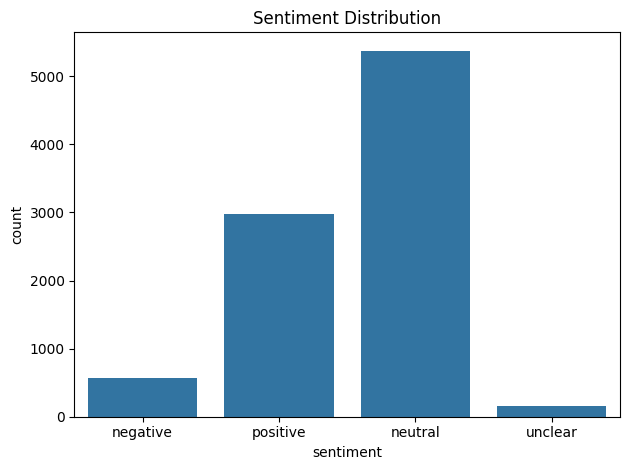

In [24]:
# sentiment distribution
sns.countplot(x = 'sentiment', data= tweets_df)
plt.title('Sentiment Distribution')
plt.tight_layout()
plt.show()

Overall,

Most tweets are neutral(no emotion)
Far tweets express negative sentiment.
This imbalance can make it harder for a model to learn how to correctly identify minority classes(especially negative).

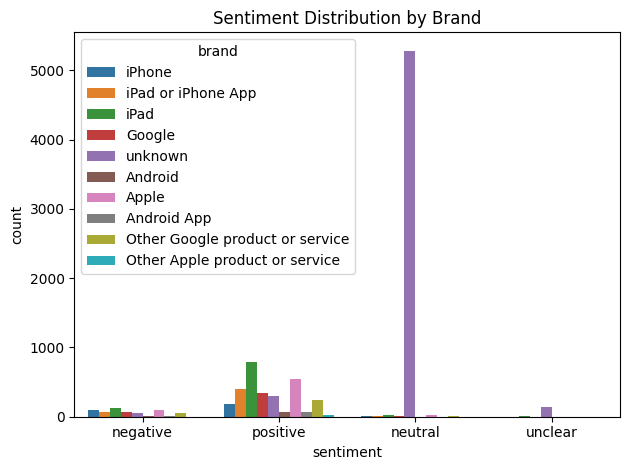

In [25]:
# plot countplot showing the sentiment by their brand

sns.countplot(x='sentiment', hue='brand', data=tweets_df)
plt.title('Sentiment Distribution by Brand')
plt.tight_layout()
plt.show()


The data is largely dominated by neutral sentiments, especially from the unknown brand group.

Among known brands, iPad and Apple have the strongest positive sentiment.

There's no strong negative trend for any specific brand, which could be good news for all involved.

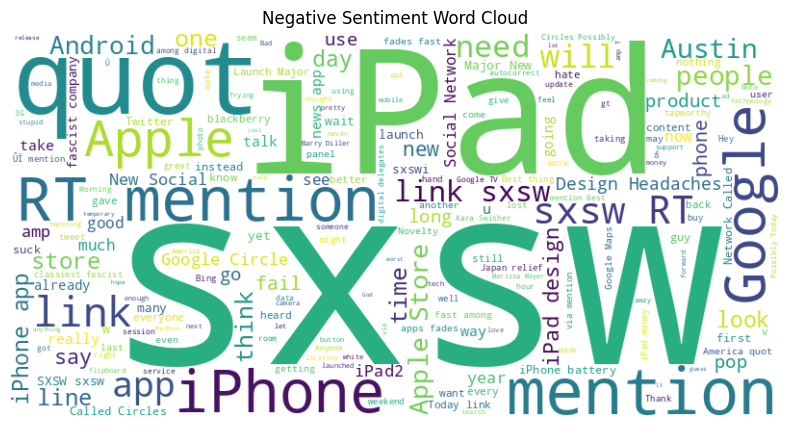

In [26]:
#word cloud for negative sentiments


text = ' '.join(tweets_df[tweets_df['sentiment'] == 'negative']['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()


This plot visualizes the frequency of words found in tweets with negative sentiments. Words such as SXSW, mention, ipad,quot and apple are larger which shows they are mentioned more frequently in negative contexts.

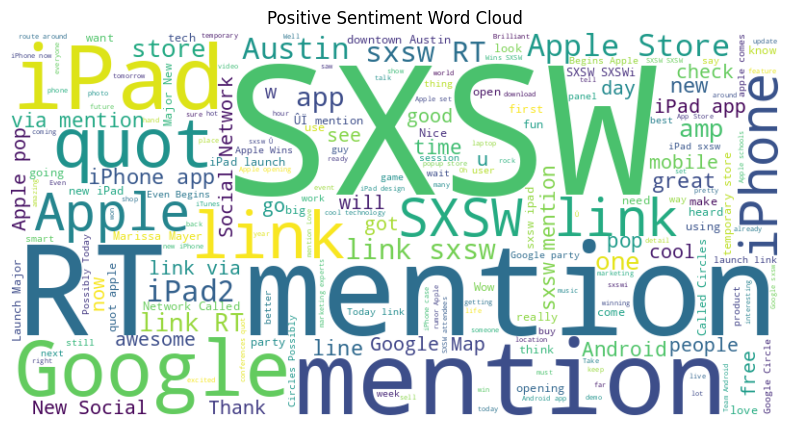

In [27]:
#word cloud for positive sentiments

text = ' '.join(tweets_df[tweets_df['sentiment'] == 'positive']['tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()


This plot shows that words like iphone, ipad, apple, Google, SXSW, RT and link appear bolder and larger, which indicates they are mentioned more often in positive contexts



## Text preprocessing

In [28]:
#cleaning the text
def clean_tweet(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"@[A-Za-z0-9]+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)
    return text

tweets_df['tweet'] = tweets_df['tweet'].apply(clean_tweet)


**Cleaning Text**

Removing mentions

Removing hashtags

Removing special characters and punctuation

In [29]:

def preprocess_text(text):
    text = text.lower()


    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])

    stemmer = PorterStemmer()

    text = ' '.join([stemmer.stem(word) for word in text.split()])

    return text


tweets_df['tweet'] = tweets_df['tweet'].apply(preprocess_text)

Converting text to lowercase

Removing common words.

Reducing words to root form

In [30]:
tweets_df['tweet']

,tweet
0,3g iphon 3 hr tweet riseaustin dead need upgra...
1,know awesom ipadiphon app youll like appreci d...
2,wait ipad 2 also sale sxsw
3,hope year festiv isnt crashi year iphon app sxsw
4,great stuff fri sxsw marissa mayer googl tim o...
...,...
9088,ipad everywher sxsw link
9089,wave buzz rt interrupt regularli schedul sxsw ...
9090,googl zeiger physician never report potenti ae...
9091,verizon iphon custom complain time fell back h...


## Feature Engineering

In [31]:
#calculate the length of each tweet in characters
tweets_df['tweet_length'] = tweets_df['tweet'].apply(len)
tweets_df['word_count'] = tweets_df['tweet'].apply(lambda x: len(x.split()))
#display the first 5 rows
tweets_df[['tweet', 'tweet_length', 'word_count']].head()

,tweet,tweet_length,word_count
0,3g iphon 3 hr tweet riseaustin dead need upgra...,67,12
1,know awesom ipadiphon app youll like appreci d...,80,14
2,wait ipad 2 also sale sxsw,26,6
3,hope year festiv isnt crashi year iphon app sxsw,48,9
4,great stuff fri sxsw marissa mayer googl tim o...,98,15


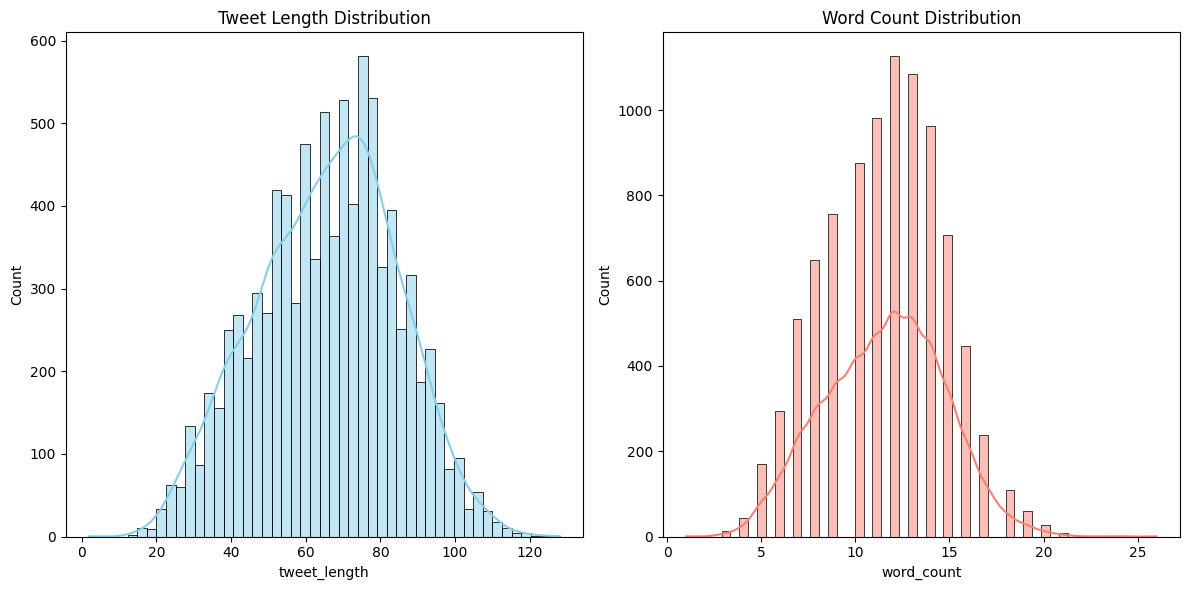

In [32]:
#create a figure
plt.figure(figsize=(12, 6))

#create a subplot
plt.subplot(1, 2, 1)
#generate a histogram
sns.histplot(tweets_df['tweet_length'], kde=True, color='skyblue')
plt.title('Tweet Length Distribution')

# Plotting word count distribution
plt.subplot(1, 2, 2)
sns.histplot(tweets_df['word_count'], kde=True, color='salmon')
plt.title('Word Count Distribution')
#display the plot
plt.tight_layout()
plt.show()


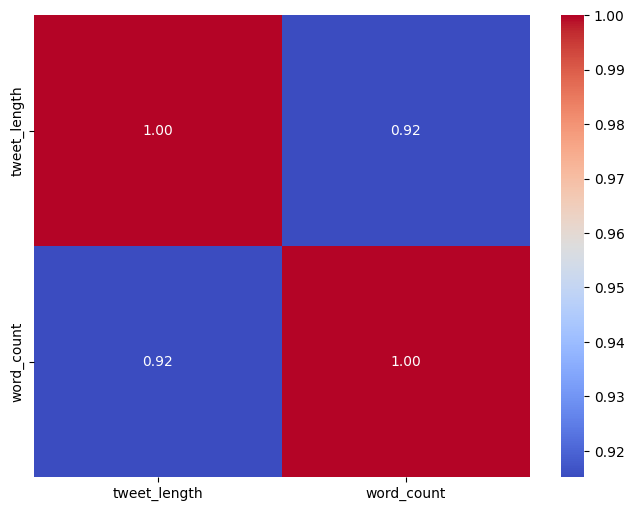

In [33]:
#Correlation
correlation_matrix = tweets_df[['tweet_length', 'word_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f");

As the number of words in a tweet increases, the tweet length (likely measured in characters) also increases — and vice versa.

This is expected, but the correlation of 0.92 quantifies this relationship as very strong.

This suggests that either variable could be a good proxy for the other in modeling or exploratory data analysis.

# Modeling

## Label Encoding

In [34]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

#Create a new dataframe containing positive and negative tweets
binary_df = tweets_df[tweets_df['sentiment'].isin(['positive', 'negative'])].copy()

#Encode the 'sentiment' column
binary_df['sentiment_encoded'] = label_encoder.fit_transform(binary_df['sentiment'])
#Display the count of each encoded sentiment
binary_df['sentiment_encoded'].value_counts()

,count
sentiment_encoded,
1,2970
0,569


2970 tweets are positive, only 569 tweets are negative (representing 84% positive tweets and 16% negative tweets)

## Binary Classification

In [35]:
#features and target
X = binary_df['tweet']
y = binary_df['sentiment_encoded']
#splitting the data into trainign and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorizing the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

#print the shapes of the data
print("X_train vectorized shape:", X_train_vec.shape)
print("X_test vectorized shape:", X_test_vec.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train vectorized shape: (2831, 4611)
X_test vectorized shape: (708, 4611)
y_train shape: (2831,)
y_test shape: (708,)


In [36]:
#Bag of words
# Fiting the vectorizer to the 'tweet' column
X_counts = vectorizer.fit_transform(tweets_df['tweet'])

# Getting the vocabulary and suming up the counts for each word across all documents
vocab = vectorizer.get_feature_names_out()
word_counts = np.array(X_counts.sum(axis=0)).flatten()

# Creating a DataFrame to easily view
frequency_df = pd.DataFrame({'word': vocab, 'count': word_counts})
frequency_df = frequency_df.sort_values('count', ascending=False)

print(frequency_df.head(20))


         word       count
7340     sxsw  555.712868
4395     link  479.452663
6496       rt  378.504804
681      appl  355.128913
3215    googl  339.322860
3934     ipad  337.025969
7168    store  284.828963
3964    iphon  229.844676
5030      new  205.263842
827    austin  195.174591
4281   launch  190.483895
671       app  186.245439
1582    circl  160.653810
6954   social  152.992672
5675    popup  150.296550
5266     open  141.951639
7703    today  134.075607
5021  network  129.660129
595       amp  129.497295
3936    ipad2  118.484243


## Logistic Regression Model

In [38]:
# Instatiate logistic regression
logreg_model = LogisticRegression(max_iter=1000)
# fit the model to the training data
logreg_model.fit(X_train_vec, y_train)

#make predictions on test data
y_pred_logreg = logreg_model.predict(X_test_vec)

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
#print the accuracy and classification
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8686440677966102
              precision    recall  f1-score   support

           0       0.93      0.13      0.23       106
           1       0.87      1.00      0.93       602

    accuracy                           0.87       708
   macro avg       0.90      0.57      0.58       708
weighted avg       0.88      0.87      0.82       708



Logistic regression accuracy is 86.69%. The model learns to predict mostly positive tweets

### Class Imbalance

In [40]:
# Applying SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vec, y_train)

# Splitting the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_vec)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8573446327683616
              precision    recall  f1-score   support

           0       0.52      0.66      0.58       106
           1       0.94      0.89      0.91       602

    accuracy                           0.86       708
   macro avg       0.73      0.78      0.75       708
weighted avg       0.87      0.86      0.86       708



Accuracy: 86% looks good at first glance.
The model learns to be really good at classifying class 1

## Multinomial NaiveBayes

In [41]:
# Initialize and train the Multinomial Naive Bayes model
mnb_model = MultinomialNB()
mnb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_mnb = mnb_model.predict(X_test_resampled)

# Evaluate the model
accuracy_mnb = accuracy_score(y_test_resampled, y_pred_mnb)
print(f"Multinomial Naive Bayes Accuracy: {accuracy_mnb}")
print(classification_report(y_test_resampled, y_pred_mnb))

Multinomial Naive Bayes Accuracy: 0.9092827004219409
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       474
           1       0.96      0.86      0.90       474

    accuracy                           0.91       948
   macro avg       0.91      0.91      0.91       948
weighted avg       0.91      0.91      0.91       948



The model performs at an accuracy of 90.9% after addressing the class imbalance. The model also has a precision of 87% on negative tweets which fairly good job

## Hyperparameter Tuning

In [ ]:
# Define the parameter grid for MultinomialNB
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Create a MultinomialNB classifier
mnb_model = MultinomialNB()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=mnb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

# Evaluate the best model on the test set
best_mnb_model = grid_search.best_estimator_
y_pred_mnb = best_mnb_model.predict(X_test_resampled)
accuracy_mnb = accuracy_score(y_test_resampled, y_pred_mnb)

print(f"Multinomial Naive Bayes Accuracy (best model): {accuracy_mnb}")
print(classification_report(y_test_resampled, y_pred_mnb))

Best hyperparameters: {'alpha': 0.1, 'fit_prior': True}
Best accuracy: 0.9252883378702906
Multinomial Naive Bayes Accuracy (best model): 0.930379746835443
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       474
           1       0.98      0.88      0.93       474

    accuracy                           0.93       948
   macro avg       0.93      0.93      0.93       948
weighted avg       0.93      0.93      0.93       948



After Hyperparameter Tuning, the model performs at an accuracy of 93% meaning that our model is very reliable in predicting negative and positive sentiments

### Confusion Matrix based on binary

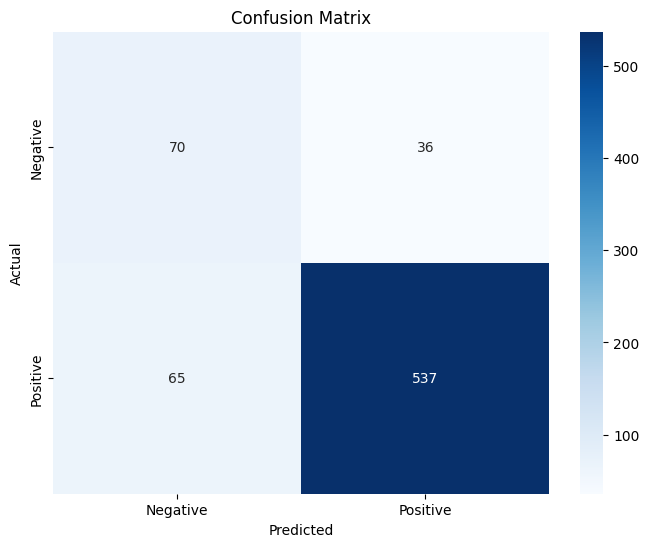

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model performs quite well with high precision (few false positives) and high recall (few false negatives).

An accuracy of 85.7% is decent, but the F1 score is even more informative in this context at 91.4%, which shows a good balance between precision and recall.

The 36 false positives and 65 false negatives might be important depending on your use case — especially if missing positives (false negatives) is costly (e.g., in disease detection).

## NN-Models

### ANN Model (Sigmoid)

In [ ]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_vec.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_resampled)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred)
recall = recall_score(y_test_resampled, y_pred)
f1 = f1_score(y_test_resampled, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.6363 - loss: 0.6585 - val_accuracy: 0.8905 - val_loss: 0.3712
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9579 - loss: 0.2213 - val_accuracy: 0.9354 - val_loss: 0.1697
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9898 - loss: 0.0485 - val_accuracy: 0.9538 - val_loss: 0.1350
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9973 - loss: 0.0190 - val_accuracy: 0.9485 - val_loss: 0.1478
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9972 - loss: 0.0127 - val_accuracy: 0.9591 - val_loss: 0.1218
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9992 - loss: 0.0060 - val_accuracy: 0.9485 - val_loss: 0.1511
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9994 - loss: 0.0041 - val_accuracy: 0.9512 - val_loss: 0.1431
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9984 - loss: 0.0056 - val_accuracy: 0.9591 - val_lo

#### Multiclass Classification

In [ ]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Filter for positive, negative, and neutral sentiments
multiclass_df = tweets_df[tweets_df['sentiment'].isin(['positive', 'negative', 'neutral'])].copy()

# Encode the 'sentiment' column
multiclass_df['sentiment_encoded'] = label_encoder.fit_transform(multiclass_df['sentiment'])

# Display the value counts of encoded sentiments
print(multiclass_df['sentiment_encoded'].value_counts())

sentiment_encoded
1    5375
2    2970
0     569
Name: count, dtype: int64


In [ ]:
# Split the data into training and testing sets
X = multiclass_df['tweet']
y = multiclass_df['sentiment_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

print("X_train vectorized shape:", X_train_vec.shape)
print("X_test vectorized shape:", X_test_vec.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train vectorized shape: (7131, 7727)
X_test vectorized shape: (1783, 7727)
y_train shape: (7131,)
y_test shape: (1783,)


In [ ]:
multiclass_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words='english')),
    ('nb', MultinomialNB())])
multiclass_pipe.fit(X_train, y_train)
y_pred = multiclass_pipe.predict(X_test)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       117
           1       0.65      0.95      0.77      1077
           2       0.69      0.24      0.36       589

    accuracy                           0.66      1783
   macro avg       0.78      0.40      0.38      1783
weighted avg       0.69      0.66      0.59      1783



**Class 0:**
Precision: 1.00  When it predicts class 0, it's always correct.

Recall: 0.01 But it almost never predicts class 0 correctly.

F1-score: 0.02 Very poor overall performance for class 0.

**Class 1:**
Precision: 0.65

Recall: 0.95 Model does a great job detecting class 1.

F1-score: 0.77 Strong performance.

**Class 2:**
Precision: 0.69

Recall: 0.24 Model misses most class 2 instances.

F1-score: 0.36 Needs improvement.


**Class 1 dominates predictions.**

### Confusion Matrix based on Multiclass classification

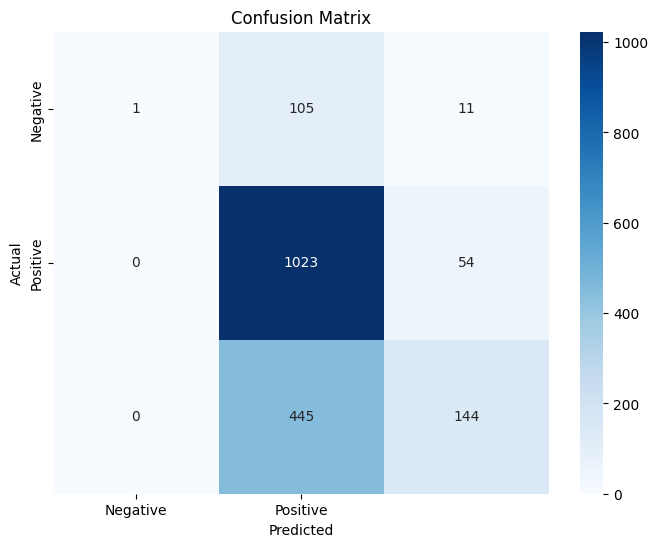

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The model performs very well on Class 1.

Class 0 is almost completely misclassified, with only 1 correct prediction.

Class 2 is mostly confused with Class 1, indicating a need to improve class separation, especially between Class 1 and Class 2.

#### Class Imbalance

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_vec, y_train)

# Split the resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test_resampled)

# Evaluate the model
accuracy_logreg = accuracy_score(y_test_resampled, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg}")
print(classification_report(y_test_resampled, y_pred_logreg))

Logistic Regression Accuracy: 0.7999224505622334
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       872
           1       0.77      0.68      0.72       904
           2       0.72      0.74      0.73       803

    accuracy                           0.80      2579
   macro avg       0.79      0.80      0.80      2579
weighted avg       0.80      0.80      0.80      2579



**Class 0** is dominating in performance.

**Class 1** has the lowest recall the model struggles more to identify actual class 1s.

**Class 2** is performing moderately well.

In [ ]:

from collections import Counter
print("Class distribution before SMOTE:", Counter(y_train))
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution before SMOTE: Counter({1: 4298, 2: 2381, 0: 452})
Class distribution after SMOTE: Counter({1: 4298, 2: 4298, 0: 4298})


### ANN Model (Softmax)

In [ ]:
# Define the ANN model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_vec.shape[1],)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=64, validation_split=0.2)

# Make predictions on the test set
y_pred_prob = model.predict(X_test_resampled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred, average='macro')
recall = recall_score(y_test_resampled, y_pred, average='macro')
f1 = f1_score(y_test_resampled, y_pred, average='macro')


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(classification_report(y_test_resampled, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.5150 - loss: 1.0050 - val_accuracy: 0.7688 - val_loss: 0.5269
Epoch 2/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.8217 - loss: 0.4335 - val_accuracy: 0.8192 - val_loss: 0.4213
Epoch 3/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.9063 - loss: 0.2401 - val_accuracy: 0.8313 - val_loss: 0.4212
Epoch 4/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9324 - loss: 0.1761 - val_accuracy: 0.8391 - val_loss: 0.4489
Epoch 5/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9439 - loss: 0.1509 - val_accuracy: 0.8352 - val_loss: 0.4896
Epoch 6/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9564 - loss: 0.1183 - val_accuracy: 0.8352 - val_loss: 0.5213
Epoch 7/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9556 - loss: 0.1052 - val_accuracy: 0.8410 - val_loss: 0.5552
Epoch 8/20
129/129 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9638 - loss: 0.0920 - val_accu

### LSTM Model

In [ ]:
# Reshape the data for LSTM
X_train_resampled = X_train_resampled.toarray()
X_test_resampled = X_test_resampled.toarray()
X_train_resampled = X_train_resampled.reshape(X_train_resampled.shape[0], 1, X_train_resampled.shape[1])
X_test_resampled = X_test_resampled.reshape(X_test_resampled.shape[0], 1, X_test_resampled.shape[1])


# Define the LSTM model
model = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(X_train_resampled.shape[1], X_train_resampled.shape[2])),
    keras.layers.Dense(3, activation='softmax') # Output layer with 3 neurons for multiclass
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train_resampled, y_train_resampled, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred_prob = model.predict(X_test_resampled)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_resampled, y_pred)
precision = precision_score(y_test_resampled, y_pred, average='macro')
recall = recall_score(y_test_resampled, y_pred, average='macro')
f1 = f1_score(y_test_resampled, y_pred, average='macro')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(classification_report(y_test_resampled, y_pred))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.6050 - loss: 1.0308 - val_accuracy: 0.7450 - val_loss: 0.6854
Epoch 2/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.8356 - loss: 0.5477 - val_accuracy: 0.8080 - val_loss: 0.4691
Epoch 3/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - accuracy: 0.8951 - loss: 0.3042 - val_accuracy: 0.8294 - val_loss: 0.4263
Epoch 4/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.9303 - loss: 0.2063 - val_accuracy: 0.8337 - val_loss: 0.4283
Epoch 5/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.9373 - loss: 0.1651 - val_accuracy: 0.8381 - val_loss: 0.4435
Epoch 6/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.9505 - loss: 0.1347 - val_accuracy: 0.8376 - val_loss: 0.4716
Epoch 7/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.9530 - loss: 0.1252 - val_accuracy: 0.8342 - val_loss: 0.5049
Epoch 8/10
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - accuracy: 0.9583 - loss: 0.1068 - v

### Hyperparameter Tuning (Randomised Search)

In [ ]:
# Define the parameter grid for MultinomialNB
param_dist = {
    'alpha': np.linspace(0.1, 1.0, 10),
    'fit_prior': [True, False]
}

# Create a MultinomialNB classifier
mnb_model = MultinomialNB()

# Reshape X_train_resampled and X_test_resampled to 2D
X_train_resampled_2D = X_train_resampled.reshape(X_train_resampled.shape[0], -1)
X_test_resampled_2D = X_test_resampled.reshape(X_test_resampled.shape[0], -1)

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=mnb_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_resampled_2D, y_train_resampled) #use the reshaped data here

# Print the best hyperparameters and the corresponding accuracy
print("Best hyperparameters:", random_search.best_params_)
print("Best accuracy:", random_search.best_score_)

# Evaluate the best model on the test set
best_mnb_model = random_search.best_estimator_
y_pred_mnb = best_mnb_model.predict(X_test_resampled_2D) #use the reshaped data here
accuracy_mnb = accuracy_score(y_test_resampled, y_pred_mnb)

print(f"Multinomial Naive Bayes Accuracy (best model): {accuracy_mnb}")
print(classification_report(y_test_resampled, y_pred_mnb))

Best hyperparameters: {'fit_prior': True, 'alpha': np.float64(0.1)}
Best accuracy: 0.7854580707707224
Multinomial Naive Bayes Accuracy (best model): 0.7879022877084141
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       872
           1       0.79      0.59      0.68       904
           2       0.67      0.80      0.73       803

    accuracy                           0.79      2579
   macro avg       0.79      0.79      0.78      2579
weighted avg       0.79      0.79      0.78      2579



# Evaluation

1) **Logistic Regression**: Achieved a reasonable accuracy, but performance might be limited by class imbalance.  SMOTE improved the model's ability to handle the imbalanced classes.

2) **Multinomial Naive Bayes**:  Performance before and after hyperparameter tuning needs comparison. This is the best model's accuracy and F1-score, on binary classification.

3) **ANN (Sigmoid)**: Performance metrics (accuracy, precision, recall, F1-score) provide a good overview of the model's classification capabilities.

4) **ANN (Softmax)**: The ANN with Softmax activation performs multiclass classification, and its performance is measured using accuracy, macro-averaged precision, recall, and F1-score. The classification report provides a detailed breakdown of its performance per class.

5) **LSTM:** The LSTM model utilizes sequential data processing. Performance metrics and the classification report highlight its ability to classify sentiments based on sequential features. This is the best model on multiclass classification.

# Conclusion

•Neutral sentiment is dominant in the dataset, indicating a lack of strong opinions, which might imply a need
for more engaging or polarizing content from brands.

•Positive sentiment for well-established brands like Apple and iPad is a good sign, suggesting strong brand
loyalty and customer satisfaction.

•The absence of significant negative sentiment across all brands could indicate a generally favorable
perception, but the dataset's neutrality suggests that there may be a gap in passionate customer advocacy or
brand differentiation.

•The word frequency plot offers valuable insights into both sentiment trends and the relevance of specific
words, which can guide further analysis or marketing efforts.

# Recommendations

•**Focus on unknown brands:**
Analyze why sentiment is mostly neutral to improve brand awareness and engagement.


•**Leverage positive sentiment for Apple and iPad:**
Highlight strengths from positive tweets to boost loyalty and reach.


•**Monitor for emerging negative trends:**
Track sentiment regularly to catch and respond to potential issues early.


•**Use word frequency analysis:**
Identify key themes and guide content using high-frequency and sentiment-linked terms.


•**Google:**
Google should increase social media engagement through targeted campaigns or product spotlights to boost
brand mentions and encourage more user-generated content, as it did not receive many mentions.